## CLIM 680 Assignments 1 & 2:
Create a Jupyter noteboook with documentation regarding the datset in question. Read this dataset into the notebook. Make a contour plot of the first time step. Continue applying techniques covered in class to this dataset.

## Data
The dataset I have chosen for this analysis will be ocean surface temperature data (tos) taken from pre-industrial model runs contained in the CMIP5 dataset.

Due to the multiude of models available for this dataset, only GFDL's CM3 model will be considered.

This dataset is contained on the COLA server at:/shared/cmip5/data/piControl/ocean/mon/Omon/tos/NOAA-GFDL.GFDL-CM3/r1i1p1

The data is stored in 100 files containing 5 years of data, for a total run length of 500 years. The data is stored using the NetCDF file format.

In [1]:
##Import necessary python libraries
import warnings;

import numpy as np; ##Numerical Calculations
import xarray as xr; ##Read netcdf files
import pandas as pd;
import matplotlib.pyplot as plt; ##Plotting

import cartopy.crs as ccrs;
import cartopy.mpl.ticker as cticker;
from cartopy.util import add_cyclic_point

In [2]:
## Read dataset into notebook   
path = '/shared/cmip5/data/piControl/ocean/mon/Omon/tos/NOAA-GFDL.GFDL-CM3/r1i1p1/';
file = 'tos_Omon_GFDL-CM3_piControl_r1i1p1_*.nc';
#dataset = xr.open_dataset( path + file )
dataset = xr.open_mfdataset( ( path + file ), concat_dim = 'time' );
print( dataset );
## Note that there is no units attribute for this file.

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 200, rlon: 360, time: 6000, vertices: 4)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * time          (time) object 0001-01-16 12:00:00 ... 0500-12-16 12:00:00
  * rlon          (rlon) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * rlat          (rlat) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
    lat           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
Data variables:
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    average_T1    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_T2    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    tos           (time, rlat, rlon) float32 dask.array<chunksize=(60, 200, 360), meta=np.ndarray>
    time_bnds     (time, bnds) object das

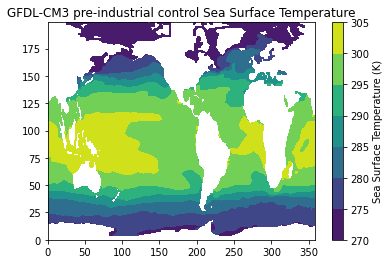

In [3]:
##Make a contour plot of the first time.
plt.contourf( dataset['tos'][0,:,:] );
plt.title( dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );
plt.colorbar( label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );


/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


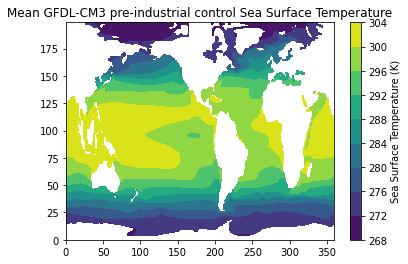

In [4]:
dataset_mean = dataset.mean( dim = 'time' );
plt.contourf( dataset_mean['tos'] );
plt.title( 'Mean ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );
plt.colorbar( label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


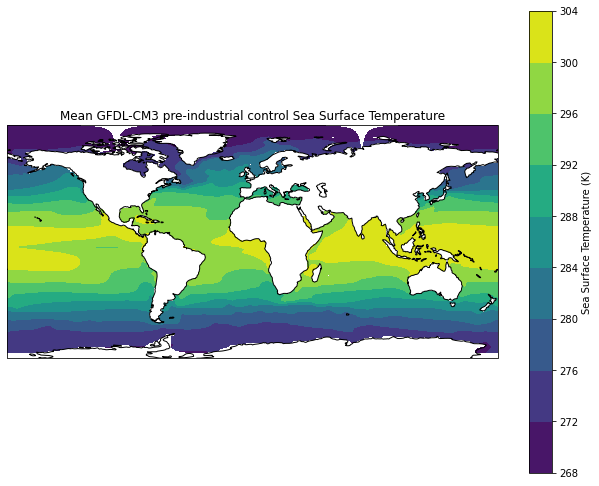

In [5]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( dataset['lon'], dataset['lat'], dataset_mean['tos'], transform = ccrs.PlateCarree() );
plt.title( 'Mean ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );

##Add coastlines
ax.coastlines();

##Add a colorbar
cbar = plt.colorbar( cs, label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


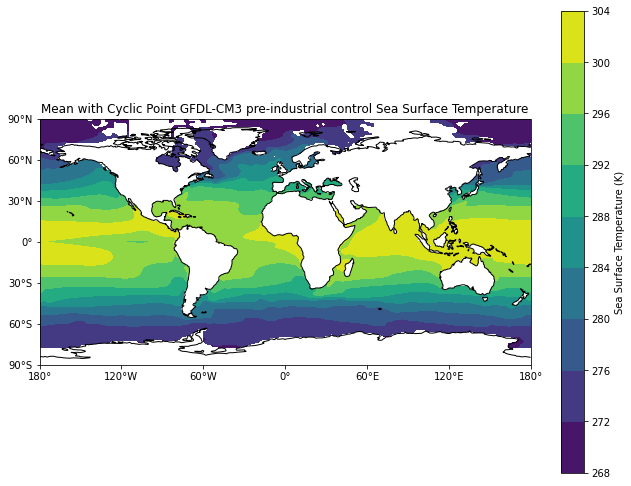

In [6]:
#Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

##Add cyclic point to data
#data = dataset_mean['tos'];
data, lons = add_cyclic_point( dataset_mean['tos'], coord = dataset_mean['rlon'] );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['rlat'], data, transform = ccrs.PlateCarree() );
plt.title( 'Mean with Cyclic Point ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );

#Add coastlines
ax.coastlines();

#Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

#Define the yticks for the latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

##Add colorbar
cbar = plt.colorbar( cs, label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

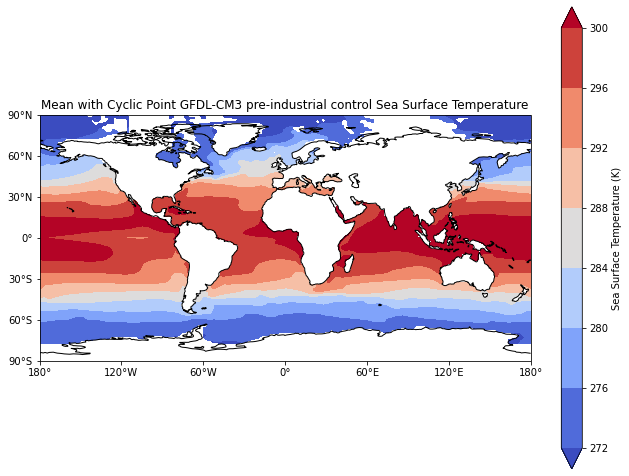

In [7]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['rlat'], data, transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both' );
plt.title( 'Mean with Cyclic Point ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );
##Add coastlines
ax.coastlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

##Add colorbar
cbar = plt.colorbar( cs, label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

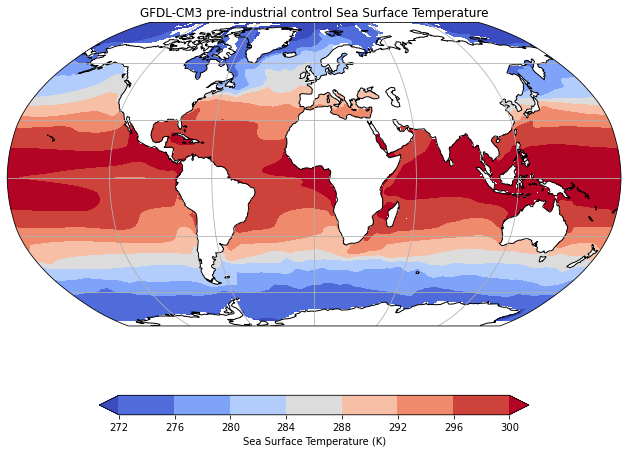

In [8]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.Robinson() );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['rlat'], data, transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7, orientation = 'horizontal', label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

#Add title
plt.title( dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );

## Assignment 2:
Apply the techniques covered in class, including longitude shifting, interpolation to a common grid, masking data using boolean arrays, subsetting of data (selecting a reduces set along one dimension), and aggregation (combining data).  Climatology and anomalies should be calculated for some quantity using the groupby() function.  

In [9]:
atmos_path = '/shared/cmip5/data/piControl/atmos/mon/Amon/tas/NOAA-GFDL.GFDL-CM3/r1i1p1/';
atmos_file = 'tas_Amon_GFDL-CM3_piControl_r1i1p1_000101-000512.nc';
dataset_atmos = xr.open_dataset( atmos_path + atmos_file );
print( dataset_atmos );
#print( dataset );

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 90, lon: 144, time: 60)
Coordinates:
  * time        (time) object 0001-01-16 12:00:00 ... 0005-12-16 12:00:00
  * lat         (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    height      float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) object ...
    lat_bnds    (lat, bnds) float64 ...
    lon_bnds    (lon, bnds) float64 ...
    tas         (time, lat, lon) float32 ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    average_DT  (time) timedelta64[ns] ...
Attributes:
    title:                  NOAA GFDL GFDL-CM3, pre-industrial control (run 1...
    institute_id:           NOAA GFDL
    source:                 GFDL-CM3 2010 atmosphere: AM3 (AM3p9,C48L48); sea...
    contact:                gfdl.climate.model.info@noaa.gov
    project_id:             CMIP5
    table_id:        

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


## Longitude Shifting
The ocean dataset is organized on a longitude grid from -280 to 80 and must be shifted to a 0-360 grid 

In [10]:
new_rlon = ( dataset['rlon'] + 360 ) % 360;
dataset = dataset.assign_coords( rlon = new_rlon );
dataset = dataset.sortby( dataset['rlon'] );
print( dataset );

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 200, rlon: 360, time: 6000, vertices: 4)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * time          (time) object 0001-01-16 12:00:00 ... 0500-12-16 12:00:00
  * rlon          (rlon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * rlat          (rlat) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
    lat           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
Data variables:
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    average_T1    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_T2    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    tos           (time, rlat, rlon) float32 dask.array<chunksize=(60, 200, 360), meta=np.ndarray>
    time_bnds     (time, bnds) object da

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/h

## Interpolatation using interp_like()
Interpolate the ocean file to the atmospheric grid.  Due to the interp_like function matching variables by name, the dimension and data variables must be renamed in the atmospheric file.

In [11]:
##Rename the dimension and data varialbes in the atmosphere file
dataset_atmos = dataset_atmos.rename( {'lat':'rlat', 'lon':'rlon', 'tas':'tos' } );
print( dataset_atmos );

<xarray.Dataset>
Dimensions:     (bnds: 2, rlat: 90, rlon: 144, time: 60)
Coordinates:
  * time        (time) object 0001-01-16 12:00:00 ... 0005-12-16 12:00:00
  * rlat        (rlat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * rlon        (rlon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    height      float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) object ...
    lat_bnds    (rlat, bnds) float64 ...
    lon_bnds    (rlon, bnds) float64 ...
    tos         (time, rlat, rlon) float32 ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    average_DT  (time) timedelta64[ns] ...
Attributes:
    title:                  NOAA GFDL GFDL-CM3, pre-industrial control (run 1...
    institute_id:           NOAA GFDL
    source:                 GFDL-CM3 2010 atmosphere: AM3 (AM3p9,C48L48); sea...
    contact:                gfdl.climate.model.info@noaa.gov
    project_id:             CMIP5
    table_id:

In [12]:
dataset_interptoatmos = dataset.interp_like( dataset_atmos );
print( dataset_interptoatmos );

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 90, rlon: 144, time: 60, vertices: 4)
Coordinates:
  * time          (time) object 0001-01-16 12:00:00 ... 0005-12-16 12:00:00
  * bnds          (bnds) float64 1.0 2.0
    lat           (rlat, rlon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
  * rlat          (rlat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * rlon          (rlon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Data variables:
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    average_T1    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_T2    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    tos           (time, rlat, rlon) float32 dask.array<chunksize=(60, 90, 144), meta=np.ndarray>
    time_bnds     (time, bnds) object dask.arr

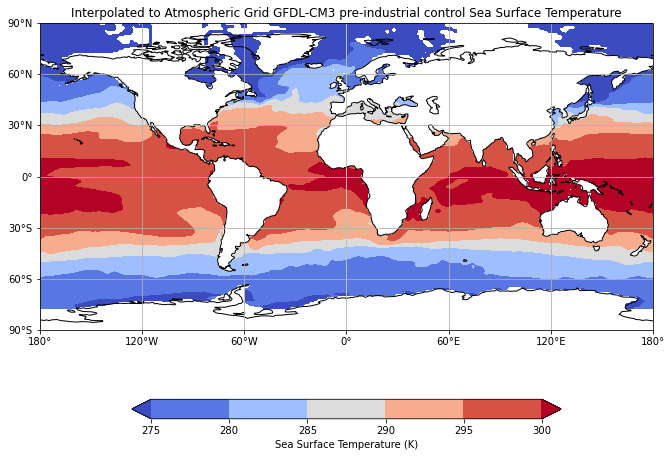

In [13]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( dataset['rlon'], dataset['rlat'], dataset['tos'][0,:,:,], transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7, orientation = 'horizontal', label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

#Add title
plt.title( 'Interpolated to Atmospheric Grid ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );


## Masking
Load a masking file, interpolate it to the atmospheric file, and mask out the land surface from the atmospheric dataset. 

In [14]:
#Data has been added over the land. We can mask the land regions out.
mask_file = '/shared/obs/gridded/OISSTv2/lmask/lsmask.nc';
mask = xr.open_dataset( mask_file );
mask = mask.reindex( lat = list( reversed( mask['lat'] ) ) );
mask = mask.rename( {'lat':'rlat', 'lon':'rlon', 'mask':'tos'} );
mask = mask.squeeze();
print( mask );

<xarray.Dataset>
Dimensions:  (rlat: 180, rlon: 360)
Coordinates:
  * rlat     (rlat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * rlon     (rlon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    time     datetime64[ns] 1981-10-29
Data variables:
    tos      (rlat, rlon) float32 ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Created 10/2002 by RHS
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/


In [15]:
mask_interptoatmos = mask.interp_like( dataset_atmos );
print( mask_interptoatmos );

<xarray.Dataset>
Dimensions:  (rlat: 90, rlon: 144)
Coordinates:
    time     datetime64[ns] 1981-10-29
  * rlat     (rlat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * rlon     (rlon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Data variables:
    tos      (rlat, rlon) float64 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Created 10/2002 by RHS
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/


In [16]:
atmos_masked = dataset_atmos['tos'].where( mask_interptoatmos['tos'] == 1 )
print( atmos_masked );
#plt.contourf( atmos_masked[0,:,:] );
#plt.colorbar(  shrink = 0.7, orientation = 'horizontal', label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );
#plt.title( 'Masked Atmospheric Data ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );
#print( dataset_atmos );
#print( dataset_atmos['tos'] );

<xarray.DataArray 'tos' (time: 60, rlat: 90, rlon: 144)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [242.43988, 242.68163, 242.92221, ..., 241.70804, 241.95305,
         242.197  ],
        [241.38089, 241.50404, 241.62593, ..., 241.00462, 241.13112,
         241.25656],
        [240.14104, 240.17819, 240.21535, ..., 240.02957, 240.06673,
         240.10388]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [252.45253, 252.74107, 253.02385, ..., 251.55405, 251.85884,
         252.1584 ],
        [249.80072, 249.

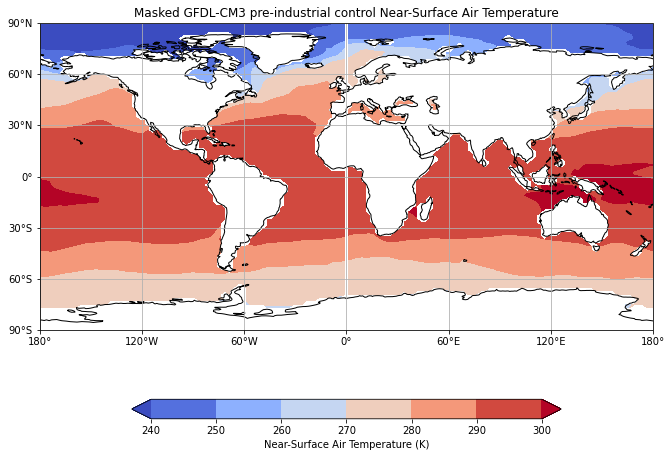

In [17]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( atmos_masked['rlon'],
                 atmos_masked['rlat'],
                 atmos_masked[0,:,:,],
                 transform = ccrs.PlateCarree(),
                 cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7,
                    orientation = 'horizontal',
                    label = dataset_atmos['tos'].attrs['long_name'] + ' (' + dataset_atmos['tos'].attrs['units'] + ')' );

#Add title
plt.title( 'Masked ' + dataset_atmos.attrs['model_id'] + ' ' + dataset_atmos.attrs['experiment'] + ' ' + dataset_atmos['tos'].attrs['long_name'] );


## Subsetting
Extract a subset of the ocean data corresponding to the North Atlantic.

In [18]:
dataset_na = dataset.sel( rlat = slice( 0, 60 ),
                         rlon = slice( 360-75, 360 ) );
print( dataset_na );

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 74, rlon: 75, time: 6000, vertices: 4)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * time          (time) object 0001-01-16 12:00:00 ... 0500-12-16 12:00:00
  * rlon          (rlon) float64 285.5 286.5 287.5 288.5 ... 357.5 358.5 359.5
  * rlat          (rlat) float64 0.1667 0.5021 0.8435 1.195 ... 57.5 58.5 59.5
    lat           (rlat, rlon) float32 dask.array<chunksize=(74, 75), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(74, 75), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
Data variables:
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    average_T1    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_T2    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    tos           (time, rlat, rlon) float32 dask.array<chunksize=(60, 74, 75), meta=np.ndarray>
    time_bnds     (time, bnds) object dask.array<chu

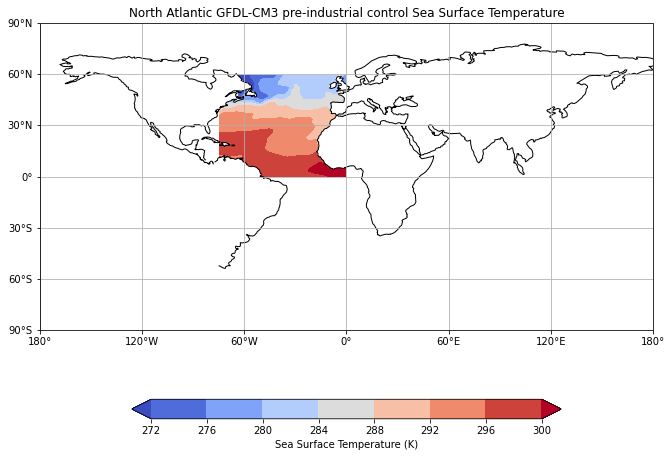

In [19]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( dataset_na['rlon'],
                 dataset_na['rlat'],
                 dataset_na['tos'][0,:,:,],
                 transform = ccrs.PlateCarree(),
                 cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7,
                    orientation = 'horizontal',
                    label = dataset_na['tos'].attrs['long_name'] + ' (' + dataset_na['tos'].attrs['units'] + ')' );

#Add title. 
plt.title( 'North Atlantic ' + dataset_na.attrs['model_id'] + ' ' + dataset_na.attrs['experiment'] + ' ' + dataset_na['tos'].attrs['long_name'] );

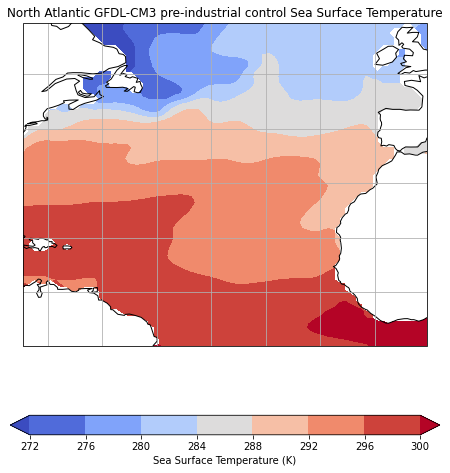

In [20]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( dataset_na['rlon'],
                 dataset_na['rlat'],
                 dataset_na['tos'][0,:,:,],
                 transform = ccrs.PlateCarree(),
                 cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
#ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
#lon_formatter = cticker.LongitudeFormatter();
#ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
#ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
#lat_formatter = cticker.LatitudeFormatter();
#ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7,
                    orientation = 'horizontal',
                    label = dataset_na['tos'].attrs['long_name'] + ' (' + dataset_na['tos'].attrs['units'] + ')' );

#Add title
plt.title( 'North Atlantic ' + dataset_na.attrs['model_id'] + ' ' + dataset_na.attrs['experiment'] + ' ' + dataset_na['tos'].attrs['long_name'] );

## Aggregate 
Calculate the area average over the North Atlantic Ocean

<xarray.DataArray 'tos' (time: 6000)>
dask.array<mean_agg-aggregate, shape=(6000,), dtype=float32, chunksize=(60,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-16 12:00:00 ... 0500-12-16 12:00:00


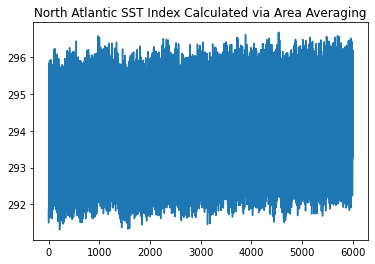

In [21]:
nasst_ind = dataset_na['tos'].mean( dim = ( 'rlat', 'rlon' ) );
print( nasst_ind );
plt.plot( nasst_ind );
plt.title( 'North Atlantic SST Index Calculated via Area Averaging' );

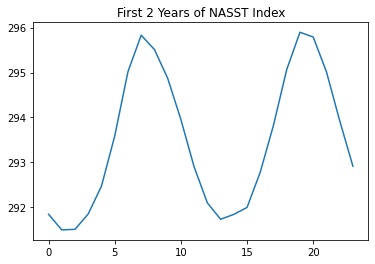

In [22]:
plt.plot( nasst_ind[0:24] );
plt.title( 'First 2 Years of NASST Index' );

## Climatology
Calculate the annual climatology of the NASST Index.  Similarly calculate the annual climatology of the NASST region.

<xarray.DataArray 'tos' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


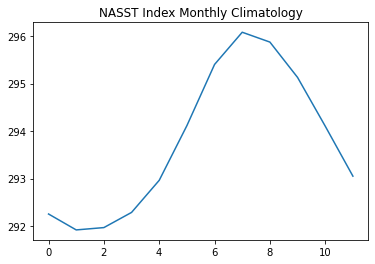

In [23]:
nasst_ind_clim = nasst_ind.groupby( 'time.month' ).mean();
print( nasst_ind_clim );
plt.plot( nasst_ind_clim );
plt.title( 'NASST Index Monthly Climatology' );

<xarray.Dataset>
Dimensions:       (bnds: 2, month: 12, rlat: 74, rlon: 75, vertices: 4)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * rlon          (rlon) float64 285.5 286.5 287.5 288.5 ... 357.5 358.5 359.5
  * rlat          (rlat) float64 0.1667 0.5021 0.8435 1.195 ... 57.5 58.5 59.5
    lat           (rlat, rlon) float32 dask.array<chunksize=(74, 75), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(74, 75), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    average_DT    (month) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    tos           (month, rlat, rlon) float32 dask.array<chunksize=(1, 74, 75), meta=np.ndarray>
    lat_vertices  (month, rlat, rlon, vertices) float64 dask.array<chunksize=(1, 74, 75, 4), meta=np.ndarray>
    lon_vertices  (month, rlat, rlon, vertices) float64 dask.array<chunksize=(1, 74, 75, 4), meta=np.ndarray>


/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


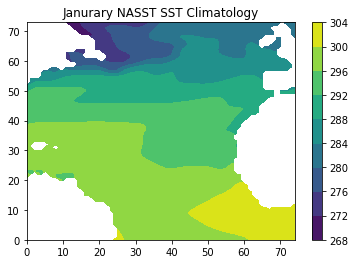

In [24]:
nasst_clim = dataset_na.groupby( 'time.month' ).mean();
print( nasst_clim );
plt.contourf( nasst_clim['tos'][0,:,:] );
plt.colorbar( );
plt.title( 'Janurary NASST SST Climatology' );

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


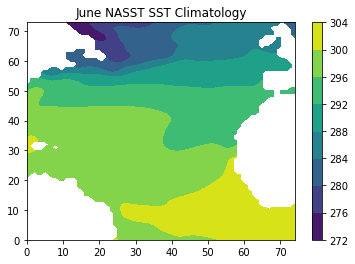

In [25]:
plt.contourf( nasst_clim['tos'][5,:,:] );
plt.colorbar( );
plt.title( 'June NASST SST Climatology' );

## Anomalies
Use the calculated climatologies to calculate the anomalies in the NASST index

In [26]:
nasst_ind_anom = nasst_ind.groupby( 'time.month' ) - nasst_ind_clim;
print( nasst_ind_anom );

<xarray.DataArray 'tos' (time: 6000)>
dask.array<getitem, shape=(6000,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-16 12:00:00 ... 0500-12-16 12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12


In [27]:
nasst_anom = dataset_na.groupby( 'time.month' ) - nasst_clim;
print( nasst_anom );

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 74, rlon: 75, time: 6000, vertices: 4)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * time          (time) object 0001-01-16 12:00:00 ... 0500-12-16 12:00:00
  * rlon          (rlon) float64 285.5 286.5 287.5 288.5 ... 357.5 358.5 359.5
  * rlat          (rlat) float64 0.1667 0.5021 0.8435 1.195 ... 57.5 58.5 59.5
    lat           (rlat, rlon) float32 dask.array<chunksize=(74, 75), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(74, 75), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
    month         (time) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    tos           (time, rlat, rlon) float32 dask.array<chunksize=(1, 74, 75), meta=np.ndarray>
    lat_vertices  (time, rlat, rlon, vertices) float64 dask.array<chunksize=(1, 74, 75, 4), meta=np.ndarray>
    lon_vertices  (t

In [28]:
nasst_anom_ind = nasst_anom.mean( dim = ( 'rlat', 'rlon' ) );
print( nasst_anom_ind );

<xarray.Dataset>
Dimensions:       (bnds: 2, time: 6000, vertices: 4)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * time          (time) object 0001-01-16 12:00:00 ... 0500-12-16 12:00:00
  * vertices      (vertices) int32 0 1 2 3
    month         (time) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    tos           (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    lat_vertices  (time, vertices) float64 dask.array<chunksize=(1, 4), meta=np.ndarray>
    lon_vertices  (time, vertices) float64 dask.array<chunksize=(1, 4), meta=np.ndarray>


/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


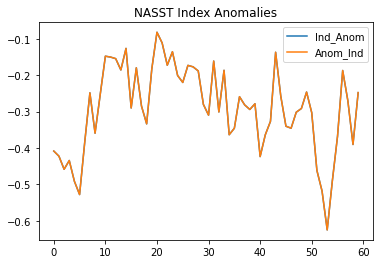

In [29]:
##Compare the NASST Index anomalies calculated in the methods
plt.plot( nasst_ind_anom[0:60] );
plt.plot( nasst_anom_ind['tos'][0:60] );
plt.title( 'NASST Index Anomalies' );
plt.legend( labels = ( 'Ind_Anom', 'Anom_Ind' ) );
##Anomalies overlap (orange is the second color, demonstrating the lack of difference between computing anomlies in different orders

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


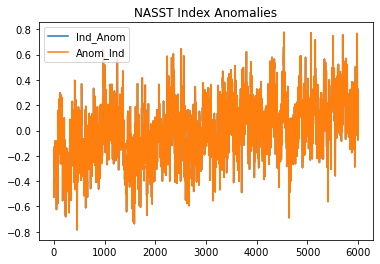

In [30]:
plt.plot( nasst_ind_anom );
plt.plot( nasst_anom_ind['tos'] );
plt.title( 'NASST Index Anomalies' );
plt.legend( labels = ( 'Ind_Anom', 'Anom_Ind' ) );